# Task 1

In [1]:
import sys
sys.path.insert(0, '/Users/laerte/pam_ai/pam_ai/src')
import random
import matplotlib.pyplot as plt
import numpy as np


from Task_1.agent import GameAgent
from Task_1.grid import GameGrid
from Task_1.simple_search import SimpleSearch
from Task_1.Dijkstra_search import DijkstraSearch

### Initialise the objects

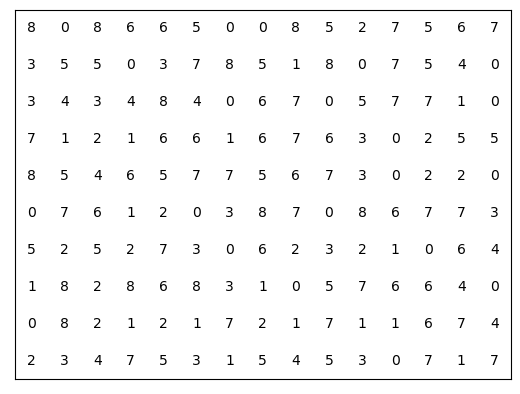

In [2]:
# The object GameAgent is employed to store agent position and the overall value of game movements
# It is initated given the initial position of the agent, i.e., (0,0) to make it start at left-upper corner
ag = GameAgent(0,0)

# The grid initiated and printed using the GameGrid class. 
# It requires as argumentes the vertical and horizontal dimensions of the grid
gd = GameGrid(10,15) 
gd.generate_grid()
gd.print_grid();


### Simple Search

Simple Search score: 69


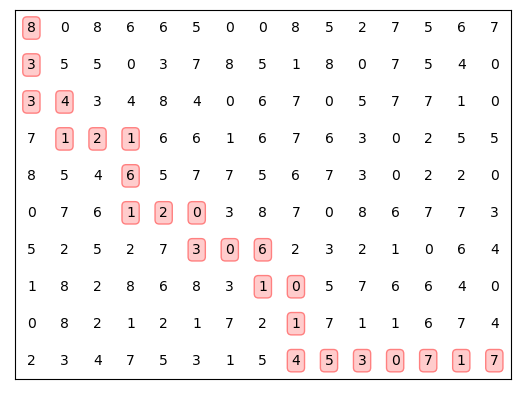

In [3]:
simple_search = SimpleSearch(ag,gd)
simple_search.compute_path()
gd.print_path(simple_search.visited_set)
print("Simple Search score: {}".format(ag.timer))

### Dijkstra Search


In [4]:
agD = GameAgent(0,0)

DS = DijkstraSearch(agD,gd)

In [5]:
DS.compute_path()

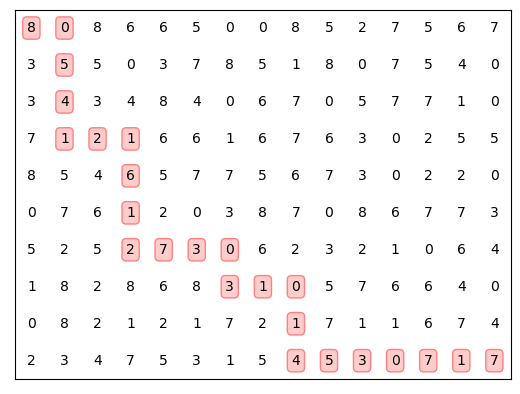

In [6]:
gd.print_path(DS.visited_set)

In [7]:
print("Simple Search: {}".format(ag.timer))
print("Dij Search: {}".format(agD.timer))

Simple Search: 69
Dij Search: 72


In [ ]:
from numpy import random
rng = random.default_rng()
